In [40]:
import pandas as pd

In [41]:
interim_path = "../data/interim/"

In [42]:
#check billboard charts
cpaths = [interim_path + "charts/bb_hot_100_" + str(x) + ".csv" for x in range(1960,2021)]
all_data = []
for path in cpaths:
    data = pd.read_csv(path)
    for index, row in data.iterrows():
        all_data.append({
            "date" : row["date"],
            "rank" : row["rank"],
            "artist" : row["artist"],
            "song" : row["song"],
            "lyricId" : row["lyricId"]
        })
HOT_CHART_DATA = pd.DataFrame(all_data)

In [43]:
# make a copy 
data = HOT_CHART_DATA
data.head(5)

,date,rank,artist,song,lyricId
0,1960-01-02,1,Marty Robbins,El Paso,1
1,1960-01-02,2,Frankie Avalon,Why,2
2,1960-01-02,3,Miss Toni Fisher,The Big Hurt,3
3,1960-01-02,4,Johnny Preston,Running Bear,4
4,1960-01-02,5,Freddie Cannon,Way Down Yonder In New Orleans,-1


In [52]:
total_entries = data.shape[0]
# number of missing lyrics 
print(data[data['lyricId']==-1].groupby(["artist", "song"]).size().reset_index().shape)

(1817, 3)


In [53]:
temp = data.groupby(["artist", "song"]).size().reset_index()

In [54]:
type(temp) # not a series?

pandas.core.frame.DataFrame

In [55]:
# check artists with most total weeks on billboard 1960-2020 inclusive
temp.sort_values(by=[0], ascending=False)

,artist,song,0
10818,Imagine Dragons,Radioactive,87
399,AWOLNATION,Sail,79
11603,Jason Mraz,I'm Yours,76
14461,LeAnn Rimes,How Do I Live,69
18097,OneRepublic,Counting Stars,68
...,...,...,...
20040,Rick Ross Featuring Ne-Yo,Super High,1
20046,Rick Ross Featuring Young Thug & Wale,Trap Trap Trap,1
6436,Dia Frampton,Inventing Shadows,1
20088,Ricky Nelson,If You Can't Rock Me,1


In [56]:
# artsit with most weeks on billboard hot 100 
tt = temp.groupby(['artist']).sum().reset_index()
tt.sort_values(by=[0], ascending=False)

,artist,0
7837,Taylor Swift,991
2553,Elton John,889
5320,Madonna,857
4517,Kenny Chesney,750
2366,Drake,735
...,...,...
1068,Bow Wow Featuring Lil Wayne,1
5639,Metro Boomin Featuring Swae Lee & Travis Scott,1
5640,Metro Boomin Featuring Travis Scott,1
5641,Metro Boomin Featuring Travis Scott & Young Thug,1


In [57]:
# number of unique tracks over 60 years
uniq_tracks = temp.shape[0]
print(uniq_tracks)

28314


In [59]:
# percent of unique songs -> approx 9% of all mentions are unique
100*uniq_tracks/HOT_CHART_DATA.shape[0]

8.89574503514124

In [60]:
#check lyrics metadata
cpaths = [interim_path + "lyrics-meta/lyrics_bb_hot_100_" + str(x) + ".csv" for x in range(1960,2021)]
all_data = []
for path in cpaths:
    data = pd.read_csv(path)
    for index, row in data.iterrows():
        all_data.append({
            "sentiment_comp" : row["sentiment_comp"],
            "sentiment_pos" : row["sentiment_pos"],
            "sentiment_neg" : row["sentiment_neg"],
            "sentiment_neu" : row["sentiment_neu"],
            "f_k_grade" : row["f_k_grade"],
            "flesch_index" : row["flesch_index"],
            "fog_index" : row["fog_index"],
            "difficult_words" : row["difficult_words"],
            "num_syllables" : row["num_syllables"],
            "num_words" : row["num_words"],
            "num_lines" : row["num_lines"],
            "num_dup" : row["num_dup"],            
            "artist" : row["artist"],
            "song" : row["song"],
            "lyricId" : row["lyricId"]
        })
LYRICS_META_DATA = pd.DataFrame(all_data)

In [61]:
data = LYRICS_META_DATA
data.head(5)

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,artist,song,lyricId
0,0.3568,0.164,0.160,0.676,1.7,97.09,3.75,40,541,469,58,0,Marty Robbins,El Paso,1
1,0.9991,0.532,0.031,0.437,-0.4,107.79,2.62,3,175,154,26,4,Frankie Avalon,Why,2
2,0.9998,0.113,0.086,0.801,5.7,65.28,3.78,1402,16420,10567,1726,5,Miss Toni Fisher,The Big Hurt,3
3,0.9982,0.322,0.022,0.657,2.2,90.46,2.52,5,275,220,35,9,Johnny Preston,Running Bear,4
4,0.9924,0.280,0.119,0.601,1.2,103.83,3.92,3,243,216,22,9,Guy Mitchell,Heartaches By The Number,5


In [62]:
# number of tracks with lyrics available
data.shape[0]

26497

In [63]:
# number of missing lyrics for tracks sanity check
temp.shape[0] - data.shape[0]

1817

In [82]:
# plot sentiment histogram
data.describe()

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,lyricId
count,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000,26497.000000
mean,0.440801,0.151567,0.082976,0.765231,2.172952,95.876875,4.140244,122.361966,2303.809261,1744.336076,131.064271,18.624222,13249.000000
std,0.805340,0.090947,0.067189,0.098279,21.685839,57.631595,22.146523,536.885904,12737.721891,9715.872564,524.704188,69.713404,7649.169378
min,-1.000000,0.000000,0.000000,0.000000,-15.700000,-8030.630000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,-0.381800,0.089000,0.034000,0.708000,0.400000,95.470000,2.700000,5.000000,232.000000,198.000000,29.000000,5.000000,6625.000000
50%,0.958000,0.131000,0.069000,0.777000,1.200000,98.720000,3.190000,9.000000,330.000000,281.000000,41.000000,12.000000,13249.000000
75%,0.993200,0.198000,0.114000,0.833000,2.100000,105.860000,3.830000,20.000000,527.000000,444.000000,60.000000,20.000000,19873.000000
max,1.000000,0.898000,0.710000,1.000000,3124.700000,206.840000,3206.950000,7411.000000,197553.000000,148516.000000,9300.000000,2104.000000,26497.000000


<AxesSubplot:>

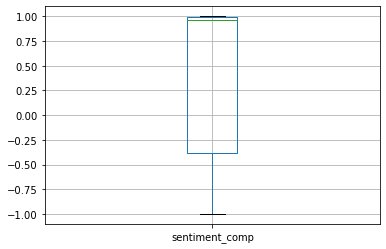

In [89]:
# there seems to some lyrics with data not relevant or completely bogus (eg lyricsid 568) 
# need to remove such entries and update charts -> possible reason for bad histograms 
# boxplots?

data.boxplot(column=["sentiment_comp"]) # overall positive sentiment

<AxesSubplot:>

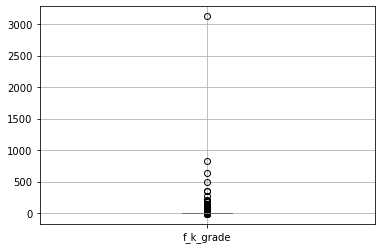

In [92]:
data.boxplot(column=["f_k_grade"])#, , 



<AxesSubplot:>

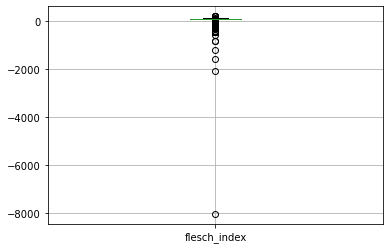

In [91]:
data.boxplot(column=["flesch_index"])

<AxesSubplot:>

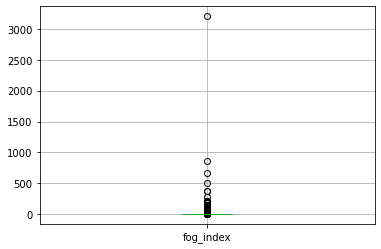

In [93]:
data.boxplot(column=["fog_index"])

In [95]:
# checking audio features
cpaths = [interim_path + "audio-feat/afeat_bb_hot_100_" + str(x) + ".csv" for x in range(1960,2021)]
all_data = []
for path in cpaths:
    data = pd.read_csv(path)
    for index, row in data.iterrows():
        all_data.append({
            "artist" : row["artist"],
            "song" : row["song"],
            "lyricId" : row["lyricId"],
            "danceability": row["danceability"],
            "energy": row["energy"],
            "key": row["key"],
            "loudness": row["loudness"],
            "mode": row["mode"],
            "speechiness": row["speechiness"],
            "acousticness": row["acousticness"],
            "instrumentalness": row["instrumentalness"],
            "liveness": row["liveness"],
            "valence": row["valence"],
            "tempo": row["tempo"],
            "uri": row["uri"],
            "duration_ms": row["duration_ms"]
        })
AUDIO_FEAT_DATA = pd.DataFrame(all_data)

In [96]:
data = AUDIO_FEAT_DATA
data.head()

,artist,song,lyricId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms
0,Marty Robbins,El Paso,1,0.654,0.452,2,-9.709,1,0.0300,0.835,0.000029,0.160,0.691,106.662,spotify:track:4f8hBeMXMvssn6HtFAtblo,259307
1,Frankie Avalon,Why,2,0.510,0.349,5,-8.677,1,0.0264,0.762,0.000000,0.130,0.586,94.267,spotify:track:0CRxGsJrwOMQUuTr4yT5mX,157520
2,Miss Toni Fisher,The Big Hurt,3,0.624,0.557,0,-8.309,1,0.0299,0.783,0.000000,0.173,0.676,123.919,spotify:track:37Au0ObjCx4KD76YBe4Y9g,130973
3,Johnny Preston,Running Bear,4,0.772,0.297,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,spotify:track:1RYznli2VNO7FCbW1Hq4KM,158200
4,Guy Mitchell,Heartaches By The Number,5,0.584,0.589,5,-11.203,1,0.0718,0.463,0.000015,0.069,0.842,172.484,spotify:track:0mmveflIg5uKskiCOdRV3e,154296


In [98]:
data.shape[0] # quite loss of some data

20276

In [99]:
data.describe()

,lyricId,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,20276.000000,2.027600e+04
mean,12875.291478,0.592993,0.617999,5.201914,-8.815516,0.735895,0.066240,0.293985,0.029883,0.192712,0.607414,120.741176,2.220613e+05
std,7461.967282,0.151287,0.200603,3.554205,3.589312,0.440867,0.074995,0.279646,0.126115,0.162928,0.238327,27.801507,6.724216e+04
min,1.000000,0.000000,0.007000,0.000000,-29.519000,0.000000,0.000000,0.000002,0.000000,0.013000,0.000000,0.000000,3.065300e+04
25%,6489.750000,0.494000,0.472000,2.000000,-11.201250,0.000000,0.031800,0.046400,0.000000,0.089700,0.422000,100.009000,1.761330e+05
50%,12719.500000,0.601000,0.633000,5.000000,-8.433000,1.000000,0.039800,0.199000,0.000007,0.130000,0.631000,119.515500,2.148670e+05
75%,19160.250000,0.700000,0.780000,8.000000,-6.009000,1.000000,0.061100,0.504000,0.000600,0.248000,0.809000,136.399250,2.542535e+05
max,26497.000000,0.988000,0.998000,11.000000,2.291000,1.000000,0.951000,0.995000,0.982000,0.999000,0.991000,241.009000,1.561133e+06


<AxesSubplot:>

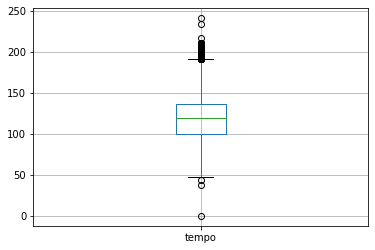

In [100]:
data.boxplot(column=['tempo'])

<AxesSubplot:>

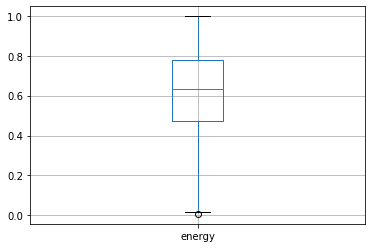

In [101]:
data.boxplot(column=['energy'])

array([[<AxesSubplot:title={'center':'key'}>]], dtype=object)

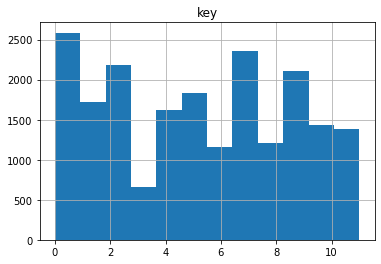

In [107]:
data.hist(column=['key'],bins=12)

<AxesSubplot:>

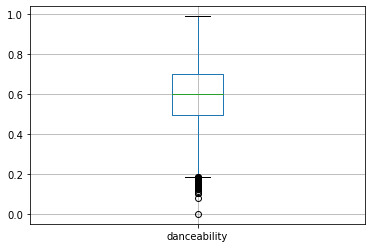

In [108]:
data.boxplot(column=["danceability"])